<a href="https://colab.research.google.com/github/Alex-So-Ma/Deep_Learning/blob/main/C%C3%B3digo_PF_TSFC_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OBJETOS ASTRONOMICOS**

Expositores:
Avalos Rivera José
(jar@ciencias.unam.mx)
&
Mario Raúl Gúzman Gutiérrez
(marioraulgz@ciencias.unam.mx)
&
Alejandro Soto Malpica
(alejandrosm@ciencias.unam.mx)

<font size=4 color='red'>Sloan Digital Sky Survey

<font color='black'>Sloan Digital Sky Survey (SDSS), ofrece datos públicos de observaciones espaciales. Los datos consisten en 10.000 observaciones del espacio tomadas por el SDSS. Cada observación se describe mediante 17 columnas de características y 1 columna de clase que la identifica como una estrella, una galaxia o un cuásar.


In [ ]:
#Se importan las librerias que se van a ocupar.
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(10)

In [ ]:
from google.colab import drive #permitimos el acceso al drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font size=4 color='red'>Ahora cargamos los datos de Sloan Digital Sky Survey DR14 que estaban en kaggle.</font>

\\



Bibliografía: Harder, Z. (2022). Machine Learning for Beginners (99% Accuracy). Retrieved 4 June 2023, from https://www.kaggle.com/code/zaynhaider/machine-learning-for-beginners-99-accuracy/notebook

In [ ]:
estelares = pd.read_csv('/content/drive/MyDrive/Proyecto IA/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
#Esta se modifica por la ruta de descarga del archivo. archivo > drive > my drive > "ubucación de tu archivo"
#y click derecho  en el archivo, copiar ruta
estelares

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


<font color='red'>RA es la ascencion recta del objeto, dec es la inclinacion. </font>

<img src="https://drive.google.com/uc?id=1pXVcJ5_LjuAljDdfwo5-28ZLnTKFR2fl">


Ascensión recta ExplicaciónySímbolos y abreviaturas. (2022). Retrieved 8 June 2022, from https://hmong.es/wiki/Right_ascension

Text(0.5, 0, 'dec')

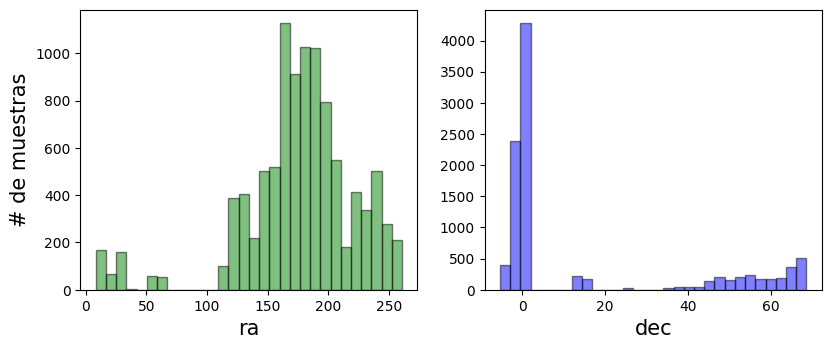

In [ ]:
plt.figure(figsize=(20,8))

ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)

ax2.hist(estelares.ra, bins=30, color='green',edgecolor='black', alpha=0.5)
ax2.set_xlabel('ra', size=15)
ax2.set_ylabel('# de muestras', size=15)

ax3.hist(estelares.dec, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax3.set_xlabel('dec', size=15)

<font size=4 color='red'>
Tanto u, g, r, i, z representan los ajustes de banda a las coordenadas Thuan-Gunn. Referentes a las propiedades fotométricas de los cúmulos de galaxias</font>

Text(0, 0.5, '# de muestras')

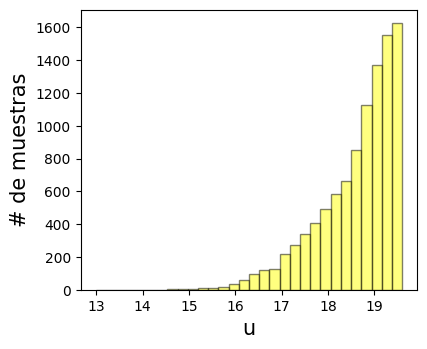

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,4)

ax1.hist(estelares.u, bins=30, color='yellow',edgecolor='black', alpha=0.5)
ax1.set_xlabel('u', size=15);
ax1.set_ylabel('# de muestras', size=15)

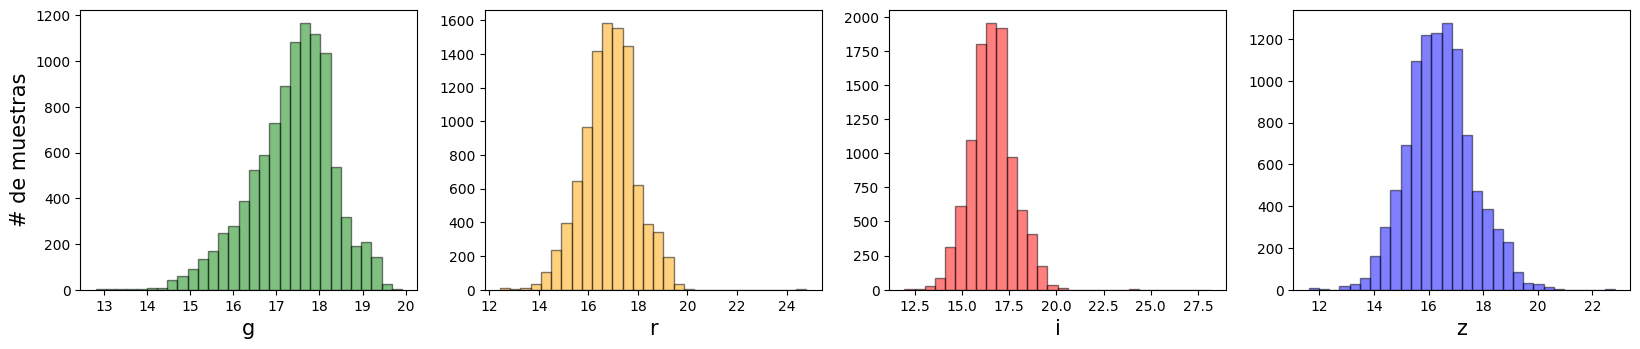

In [ ]:
plt.figure(figsize=(20,8))

ax2 = plt.subplot(2,4,1)
ax3 = plt.subplot(2,4,2)
ax4 = plt.subplot(2,4,3)
ax5 = plt.subplot(2,4,4)


ax2.hist(estelares.g, bins=30, color='green',edgecolor='black', alpha=0.5)
ax2.set_xlabel('g', size=15)
ax2.set_ylabel('# de muestras', size=15)

ax3.hist(estelares.r, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax3.set_xlabel('r', size=15)

ax4.hist(estelares.i, bins=30, color='red',edgecolor='black', alpha=0.5)
ax4.set_xlabel('i', size=15)

ax5.hist(estelares.z, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax5.set_xlabel('z', size=15);

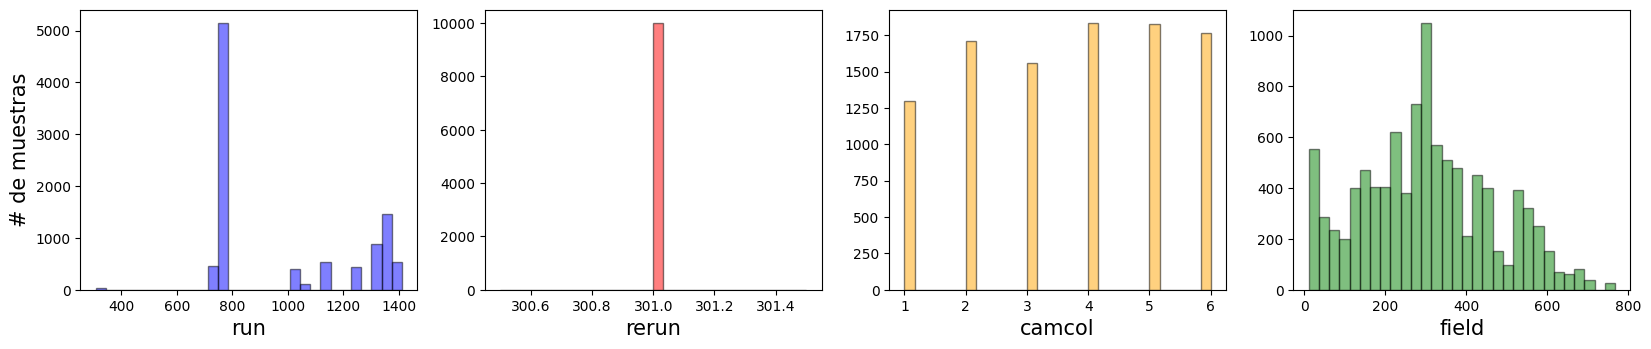

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.run, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax1.set_xlabel('run', size=15)
ax1.set_ylabel('# de muestras', size=15)

ax2.hist(estelares.rerun, bins=30, color='red',edgecolor='black', alpha=0.5)
ax2.set_xlabel('rerun', size=15)

ax3.hist(estelares.camcol, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax3.set_xlabel('camcol', size=15)

ax4.hist(estelares.field, bins=30, color='green',edgecolor='black', alpha=0.5)
ax4.set_xlabel('field', size=15);

<font size=4 color='red'>
Estos parametros son caracteristicas de las imagenes tomadas por el SDSS, siendo un campo una parte de la imagen, donde run es la exploración específica realizada, rerun indica el procesamiento, camcol la busqueda en el recorrido del objeto, field cuantifica el recorrido (va de 0 a 800).

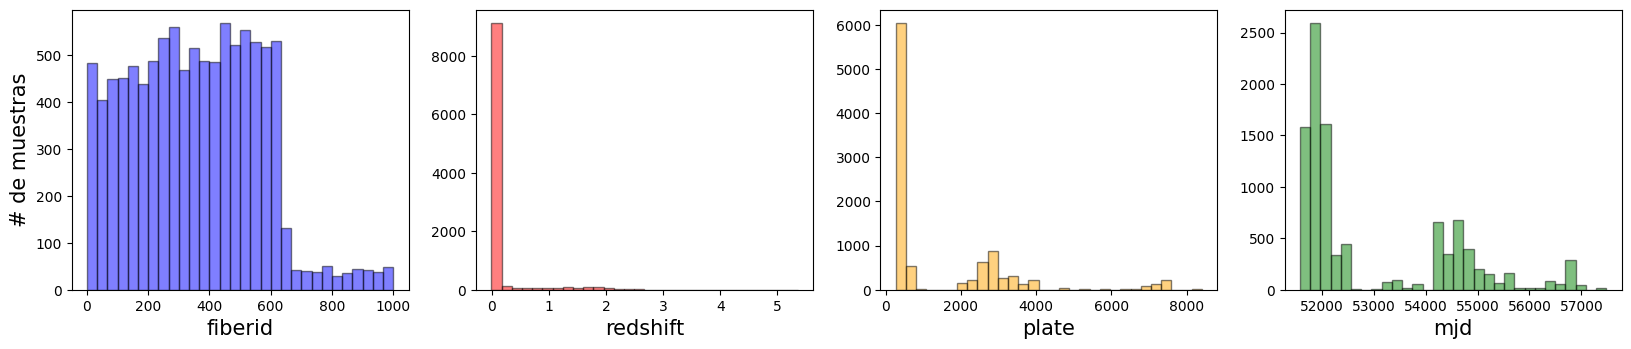

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(estelares.fiberid, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax1.set_xlabel('fiberid', size=15)
ax1.set_ylabel('# de muestras', size=15)

ax2.hist(estelares.redshift, bins=30, color='red',edgecolor='black', alpha=0.5)
ax2.set_xlabel('redshift', size=15)

ax3.hist(estelares.plate, bins=30, color='orange',edgecolor='black', alpha=0.5)
ax3.set_xlabel('plate', size=15)

ax4.hist(estelares.mjd, bins=30, color='green',edgecolor='black', alpha=0.5)
ax4.set_xlabel('mjd', size=15);

<font size=4 color='red'>
**Fiberid** es el identificador de fibras del espectrógrafo, **redshift** es el fenemomeno en cual la radiacion electromagnetica de un objeto aumenta en terminos de longitud de onda, **plate** es el numero de bandeja del espectroscopio, y finalmente **mjd** corresponde a la fecha juliana en la cual se capturaron los datos.   

### Preprocesamiento y Muestreo de los Datos


### Preprocesamiento de los datos

In [ ]:
datos=estelares.loc[:,'ra':'fiberid']; #se quita el id_ de los objetos estelares
datos

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [ ]:
# Se forman los vectores one-hot
clases=[]
for i in datos['class']:
    if i=='STAR': clases.append([1,0,0])
    if i=='GALAXY': clases.append([0,1,0])
    if i=='QSO': clases.append([0,0,1])

clases=np.array(clases)
clases

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
datos=datos.drop({'class','rerun'}, axis=1) # Se quita los otros parametros que no nos sirven para
datos

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


In [ ]:
#Normalizamos datos con la media
X=(datos-datos.mean())/datos.std()
X=np.array(X)
X

array([[ 0.16745005, -0.58489347,  1.0314348 , ...,  1.03143778,
         1.30924518,  0.66859834],
       [ 0.16885314, -0.58308514,  0.05242784, ..., -0.63618077,
        -0.87915344,  0.910966  ],
       [ 0.17056581, -0.58344607,  0.92152188, ..., -0.65630624,
        -0.60916051,  0.77524011],
       ...,
       [-0.92034866,  1.4608336 ,  0.16752988, ...,  3.26592366,
         2.69295897,  1.30360162],
       [-0.92192684,  1.46424787,  0.31800245, ..., -0.56685972,
        -0.70577563, -0.60140821],
       [-0.91799534,  1.46631987,  0.79225232, ..., -0.56685972,
        -0.70577563, -0.5820188 ]])

### Muestreo de los datos


Ahora se separaran los datos en dos grupos uno para el modelo y otro para la prediccion.

In [ ]:
def split(X,Y,porcent): #Es funcion El porcentaje debe estar dado entre 0 y 1, será el porcentaje referente a X
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)

    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)

    return X_learn,Y_learn,X_val,Y_val

Usamos la funcion split para obtener tres conjuntos: datos de entrenamiento, de validación y de evaluación.

In [ ]:
split_size=0.8
X_modelo,Y_modelo,X_pred,Y_pred=split(X,clases,split_size)

In [ ]:
split_size=0.9
X_learn,Y_learn,X_val,Y_val=split(X_modelo,Y_modelo,split_size)

Veamos el tamaño final de los conjuntos de datos

In [ ]:
print(f"El tamaño de los datos X de entrenamiento es: {X_learn.shape}")
print(f"El tamaño de los datos X de validación es: {X_val.shape}")
print(f"El tamaño de los datos X de evaluación es: {X_pred.shape}")

El tamaño de los datos X de entrenamiento es: (7200, 15)
El tamaño de los datos X de validación es: (800, 15)
El tamaño de los datos X de evaluación es: (2000, 15)


In [ ]:
print(f"El tamaño de los datos Y de entrenamiento es: {Y_learn.shape}")
print(f"El tamaño de los datos Y de validación es: {Y_val.shape}")
print(f"El tamaño de los datos Y de evaluación es: {Y_pred.shape}")

El tamaño de los datos Y de entrenamiento es: (7200, 3)
El tamaño de los datos Y de validación es: (800, 3)
El tamaño de los datos Y de evaluación es: (2000, 3)


### Modelación de la red neuronal

Definamos la función  **architecture**, la cual servira para iterar rapidamente entre modelos. Este usa un modelo secuencial para definir una red neuronal con 5 capas densas, donde podremos variar el numero de neuronas por capa, si queremos batch normalization y/o dropout.



In [ ]:
#Modelo 'Sequential'
def architecture(nodos, batch_normalization, dropout):

  model=Sequential()

#la primer capa, se utiliza sigmoide como función de activación para capas ocultas
  # 1
  model.add(Dense(nodos,input_shape=(15,),bias_initializer='zeros',activation='sigmoid'))
  # 2
  model.add(Dense(nodos,bias_initializer='zeros',activation='sigmoid'))
  #dropout 1
  if dropout:
        model.add(Dropout(0.5))
  if batch_normalization:
        model.add(BatchNormalization())
  # 3
  model.add(Dense(nodos,bias_initializer='zeros',activation='sigmoid'))
  #dropout 2
  if dropout:
        model.add(Dropout(0.5))
  if batch_normalization:
        model.add(BatchNormalization())
  #4
  model.add(Dense(nodos,bias_initializer='zeros',activation='sigmoid'))

# capa de salida
  model.add(Dense(3,bias_initializer='zeros',activation='softmax'))
  return model

Definamos y visualizemos los modelos

Nuestra primer red neuronal es una RNN de 5 capas, con 50 neuronas por capa y sin Batch Normalization ni Dropout.

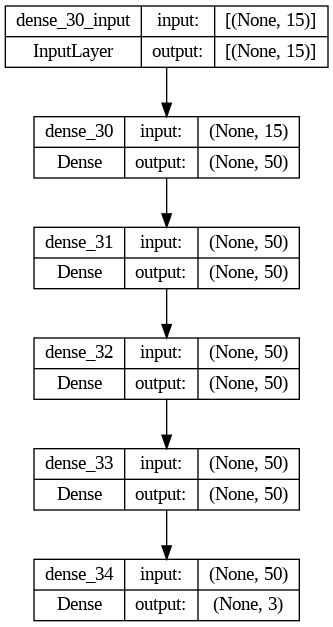

In [ ]:
batch_normalization=False
dropout=False
nodos=50

model_1 = architecture(nodos, batch_normalization, dropout)
plot_model(model_1, show_shapes=True, rankdir='TB', expand_nested=True, show_layer_names=True, dpi=96)

Nuestra segunda red neuronal es una RNN de 5 capas, con 150 neuronas por capa y sin Batch Normalization ni Dropout.


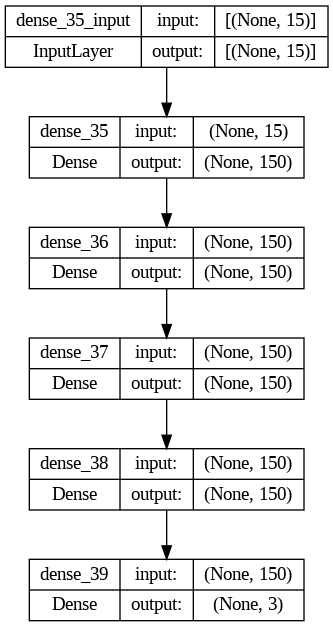

In [ ]:
batch_normalization=False
dropout=False
nodos=150

model_2 = architecture(nodos, batch_normalization, dropout)
plot_model(model_2, show_shapes=True, rankdir='TB', expand_nested=True, show_layer_names=True, dpi=96)

Nuestra tercera red neuronal es una RNN de 5 capas, con 150 neuronas por capa, con Batch Normalization y Dropout.

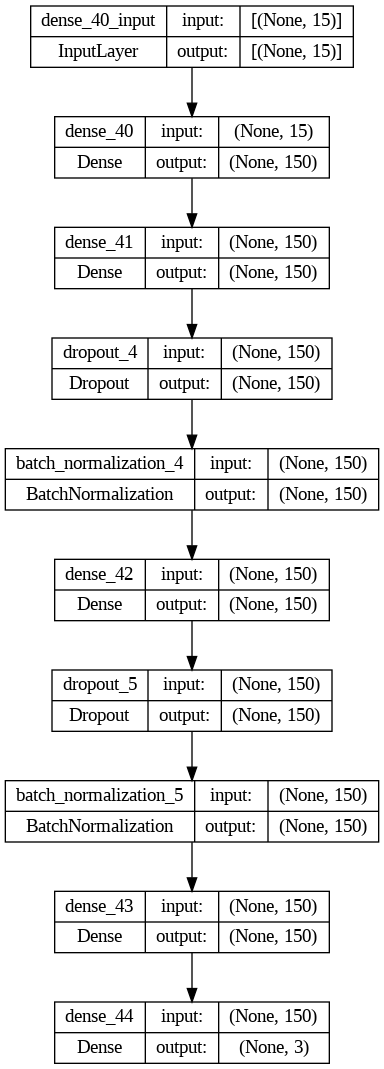

In [ ]:
batch_normalization=True
dropout=True
nodos=150

model_3 = architecture(nodos, batch_normalization, dropout)
plot_model(model_3, show_shapes=True, rankdir='TB', expand_nested=True, show_layer_names=True, dpi=96)

### Entrenamiento de las redes neuronales

Usamos la función de pérdida: "Categorical Crossentropy" ya que se trata de un problema de clasificación
Y se monitoreo la métrica de "Accuracy". Entrenaremos todas las redes neuronales por **100** epocas y usaremos un Learning Rate de **0.001**

In [ ]:
epocas=100
lr = 0.001
cb = EarlyStopping(monitor="val_loss", patience=3)

Comenzamos a compilar y entrenar las redes neuronales, guardando el historial para fines comparativos.

Empecemos con la mas pequeña.

In [ ]:
#Se compila la red neuronal
model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'], \
optimizer=optimizers.Adam(learning_rate=lr,beta_1=0.9, beta_2=0.999, amsgrad=False))

#procesamos los datos de entrenamiento con 'fit()'
history_1=model_1.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas,shuffle=True, callbacks=[cb])

Epoch 1/100
225/225 [==============================] - 2s 3ms/step - loss: 0.7942 - accuracy: 0.6457 - val_loss: 0.4867 - val_accuracy: 0.8288
Epoch 2/100
225/225 [==============================] - 1s 2ms/step - loss: 0.3738 - accuracy: 0.8746 - val_loss: 0.3036 - val_accuracy: 0.8988
Epoch 3/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9125 - val_loss: 0.2638 - val_accuracy: 0.9050
Epoch 4/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2331 - accuracy: 0.9242 - val_loss: 0.2281 - val_accuracy: 0.9287
Epoch 5/100
225/225 [==============================] - 1s 2ms/step - loss: 0.1927 - accuracy: 0.9369 - val_loss: 0.1900 - val_accuracy: 0.9350
Epoch 6/100
225/225 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9515 - val_loss: 0.1431 - val_accuracy: 0.9500
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9626 - val_loss: 0.1063 - val_accuracy: 0.9750

Veamos la perdida y el accuracy del conjunto de validación con esta arquitectura.

In [ ]:
loss, acc = model_1.evaluate(X_val,Y_val)

25/25 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9850


Seguimos con la de 150 neuronas por capa, sin algun metodo de regularizacion o dropout.

In [ ]:
#Se compila la red neuronal
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], \
optimizer=optimizers.Adam(learning_rate=lr,beta_1=0.9, beta_2=0.999, amsgrad=False))

#procesamos los datos de entrenamiento con 'fit()'
history_2=model_2.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas,shuffle=True, callbacks=[cb])

Epoch 1/100
225/225 [==============================] - 2s 4ms/step - loss: 0.6138 - accuracy: 0.7128 - val_loss: 0.3179 - val_accuracy: 0.9025
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2748 - accuracy: 0.9064 - val_loss: 0.2550 - val_accuracy: 0.9137
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2056 - accuracy: 0.9304 - val_loss: 0.1600 - val_accuracy: 0.9500
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.1554 - accuracy: 0.9482 - val_loss: 0.1106 - val_accuracy: 0.9688
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.1363 - accuracy: 0.9578 - val_loss: 0.1136 - val_accuracy: 0.9613
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.1197 - accuracy: 0.9646 - val_loss: 0.1154 - val_accuracy: 0.9588
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9689 - val_loss: 0.0782 - val_accuracy: 0.9800

Veamos la perdida y el accuracy del conjunto de validación con esta arquitectura.

In [ ]:
loss, acc = model_2.evaluate(X_val,Y_val)

25/25 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9675


Finalmente, una de 150 neuronas por capa, con Batch Normalization y Dropout.

In [ ]:
#Se compila la red neuronal
model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'], \
optimizer=optimizers.Adam(learning_rate=lr,beta_1=0.9, beta_2=0.999, amsgrad=False))

#procesamos los datos de entrenamiento con 'fit()'
history_3=model_3.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas,shuffle=True)

Epoch 1/100
225/225 [==============================] - 3s 4ms/step - loss: 0.5979 - accuracy: 0.7492 - val_loss: 0.3938 - val_accuracy: 0.8712
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8919 - val_loss: 0.2556 - val_accuracy: 0.9013
Epoch 3/100
225/225 [==============================] - 1s 4ms/step - loss: 0.2634 - accuracy: 0.9076 - val_loss: 0.2316 - val_accuracy: 0.9075
Epoch 4/100
225/225 [==============================] - 1s 4ms/step - loss: 0.2313 - accuracy: 0.9214 - val_loss: 0.1289 - val_accuracy: 0.9600
Epoch 5/100
225/225 [==============================] - 1s 5ms/step - loss: 0.1916 - accuracy: 0.9353 - val_loss: 0.1036 - val_accuracy: 0.9700
Epoch 6/100
225/225 [==============================] - 1s 5ms/step - loss: 0.1753 - accuracy: 0.9415 - val_loss: 0.0874 - val_accuracy: 0.9812
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.1607 - accuracy: 0.9503 - val_loss: 0.1363 - val_accuracy: 0.9425

Veamos la perdida y el accuracy del conjunto de validación con esta arquitectura.

In [ ]:
loss, acc = model_3.evaluate(X_val,Y_val)

25/25 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9862


### Comparación y conclusiones

#### Pérdida

Grafiquemos la Pérdida de los tres modelos para comparar su rendimiento

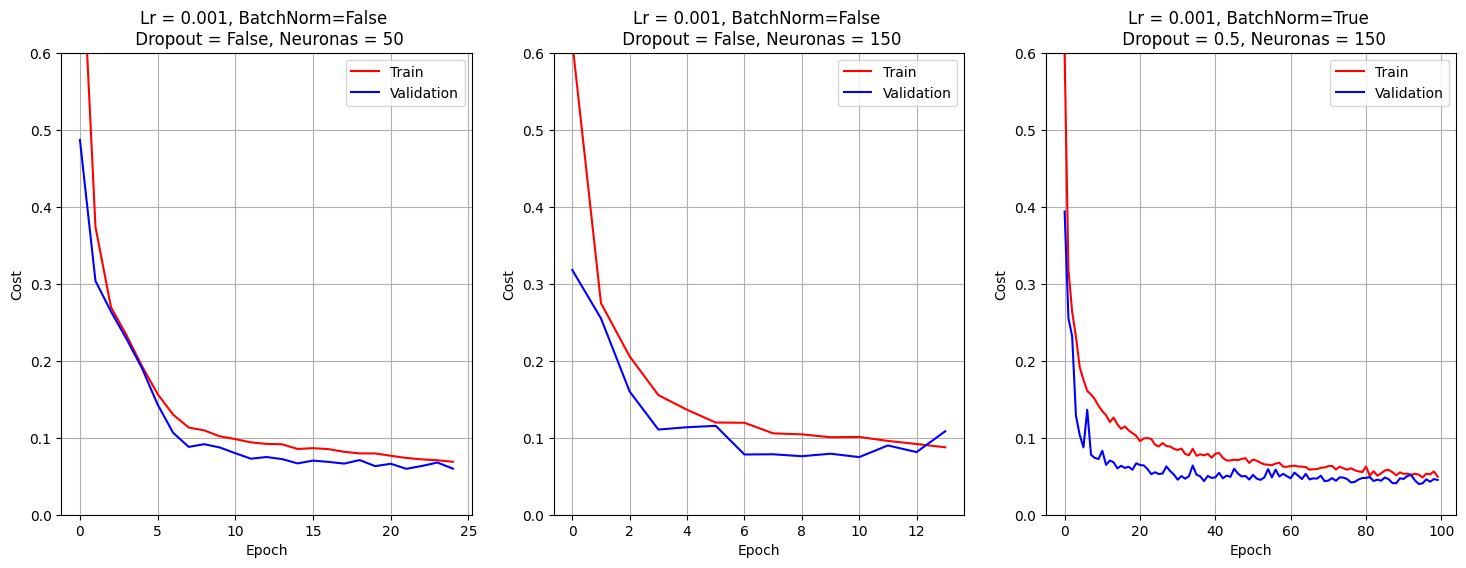

In [ ]:
#Graficamos el Cost
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with three subplots

# Plot the first subplot
axs[0].plot(history_1.history['loss'], color='red')
axs[0].plot(history_1.history['val_loss'], color='blue')
axs[0].set_title('Lr = 0.001, BatchNorm=False \n Dropout = False, Neuronas = 50')
axs[0].set_ylabel('Cost')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper right')
axs[0].grid()
axs[0].set_ylim(top=0.6)
axs[0].set_ylim(bottom=0)

# Plot the second subplot
axs[1].plot(history_2.history['loss'], color='red')
axs[1].plot(history_2.history['val_loss'], color='blue')
axs[1].set_title('Lr = 0.001, BatchNorm=False \n Dropout = False, Neuronas = 150')
axs[1].set_ylabel('Cost')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper right')
axs[1].grid()
axs[1].set_ylim(top=0.6)
axs[1].set_ylim(bottom=0)

# Plot the third subplot
axs[2].plot(history_3.history['loss'], color='red')
axs[2].plot(history_3.history['val_loss'], color='blue')
axs[2].set_title('Lr = 0.001, BatchNorm=True \n Dropout = 0.5, Neuronas = 150')
axs[2].set_ylabel('Cost')
axs[2].set_xlabel('Epoch')
axs[2].legend(['Train', 'Validation'], loc='upper right')
axs[2].grid()
axs[2].set_ylim(top=0.6)
axs[2].set_ylim(bottom=0)

plt.show()

#### Accuracy

Grafiquemos el Accuracy de los tres modelos para comparar su rendimiento

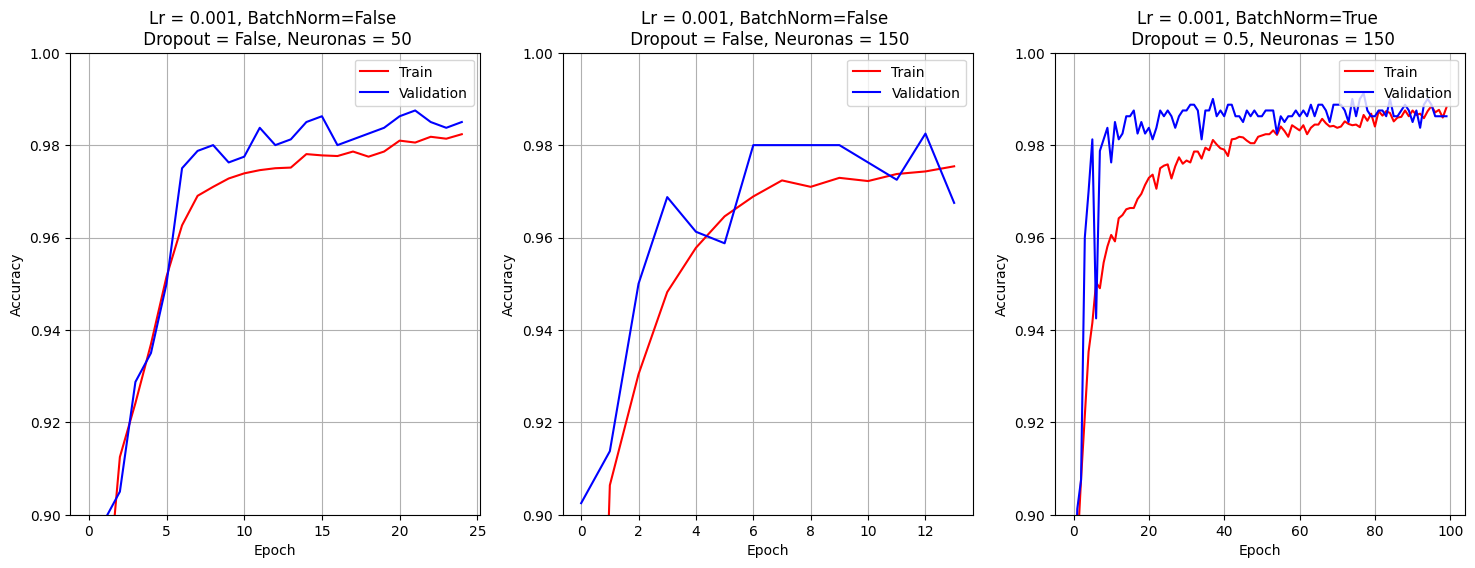

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with three subplots

# Plot the first subplot
axs[0].plot(history_1.history['accuracy'], color='red')
axs[0].plot(history_1.history['val_accuracy'], color='blue')
axs[0].set_title('Lr = 0.001, BatchNorm=False \n Dropout = False, Neuronas = 50')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper right')
axs[0].grid()
axs[0].set_ylim(top=1)
axs[0].set_ylim(bottom=0.9)

# Plot the second subplot
axs[1].plot(history_2.history['accuracy'], color='red')
axs[1].plot(history_2.history['val_accuracy'], color='blue')
axs[1].set_title('Lr = 0.001, BatchNorm=False \n Dropout = False, Neuronas = 150')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper right')
axs[1].grid()
axs[1].set_ylim(top=1)
axs[1].set_ylim(bottom=0.9)

# Plot the third subplot
axs[2].plot(history_3.history['accuracy'], color='red')
axs[2].plot(history_3.history['val_accuracy'], color='blue')
axs[2].set_title('Lr = 0.001, BatchNorm=True \n Dropout = 0.5, Neuronas = 150')
axs[2].set_ylabel('Accuracy')
axs[2].set_xlabel('Epoch')
axs[2].legend(['Train', 'Validation'], loc='upper right')
axs[2].grid()
axs[2].set_ylim(top=1)
axs[2].set_ylim(bottom=0.9)

plt.show()

In [ ]:
def predicciones_nn(modelo, X_pred, y_pred):
  predicciones=modelo.predict(X_pred)
  k=0
  for i in range(len(y_pred)):
    if np.argmax(predicciones[i])==np.argmax(y_pred[i]):
        k=k+1
  return k/len(y_pred)*100


In [ ]:
print("El acierto de las predicciones para el modelo 1 es",predicciones_nn(model_1, X_pred, Y_pred),"%")
print("El acierto de las predicciones para el modelo 2 es",predicciones_nn(model_2, X_pred, Y_pred),"%")
print("El acierto de las predicciones para el modelo 3 es",predicciones_nn(model_3, X_pred, Y_pred),"%")

63/63 [==============================] - 0s 2ms/step
El acierto de las predicciones para el modelo 1 es 98.55000000000001 %
63/63 [==============================] - 0s 1ms/step
El acierto de las predicciones para el modelo 2 es 96.45 %
63/63 [==============================] - 0s 2ms/step
El acierto de las predicciones para el modelo 3 es 98.95 %


Consideramos que el modelo 3 es bastante bueno, en parte debido al gran número de épocas, a que usamos dropout (pues no aparenta tener overfitting), tampoco tiene underfitting pues vemos que se acercan los conjuntos de entrenamiento y validación y el accuracy dió 98.7% (incluso en algunos casos superó el 99.9%)